# Nonconvex Quadratic Problem

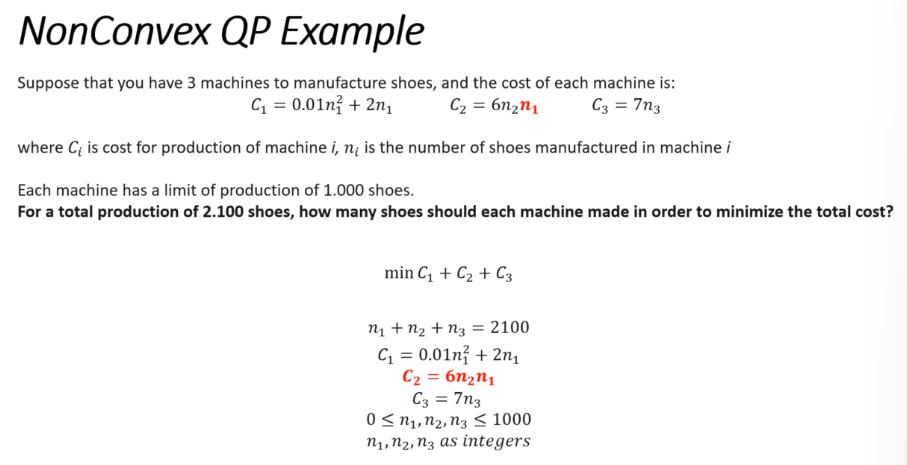

In [8]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory
import numpy as np
import time


model = pyo.ConcreteModel()

model.n = pyo.Var(range(1,4), within = Integers, bounds=(0,1000))
model.c = pyo.Var(range(1,4))

n = model.n
c = model.c

model.v1 = pyo.Constraint(expr= pyo.summation(n) == 2100)
model.v2 = pyo.Constraint(expr= 0.01*n[1]*n[1]+2*n[1] == c[1])
model.v3 = pyo.Constraint(expr= 6*n[2]*n[1] == c[2])
model.v4 = pyo.Constraint(expr= 7*n[3] == c[3])

model.obj = pyo.Objective(expr= pyo.summation(c))

st_pyo = time.perf_counter()

opt = SolverFactory('gurobi')
opt.options['NonConvex'] = 2
result = opt.solve(model)

et_pyo = time.perf_counter()
est_pyo = et_pyo - st_pyo

model.pprint()

for i in range(1,4):
    print('n%i = %i' % (i,pyo.value(n[i])))
    print('c%i = %i' % (i,pyo.value(c[i])))
print('obj = ', pyo.value(model.obj))
print('nTotal = ', pyo.value(pyo.summation(n)))

2 Set Declarations
    c_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {1, 2, 3}
    n_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {1, 2, 3}

2 Var Declarations
    c : Size=3, Index=c_index
        Key : Lower : Value    : Upper : Fixed : Stale : Domain
          1 :  None :    300.0 :  None : False : False :  Reals
          2 :  None : 600000.0 :  None : False : False :  Reals
          3 :  None :   7000.0 :  None : False : False :  Reals
    n : Size=3, Index=n_index
        Key : Lower : Value  : Upper : Fixed : Stale : Domain
          1 :     0 :  100.0 :  1000 : False : False : Integers
          2 :     0 : 1000.0 :  1000 : False : False : Integers
          3 :     0 : 1000.0 :  1000 : False : False : Integers

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sen